In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import os
from sqlalchemy import create_engine
import sqlite3
HOME_PATH = os.getcwd()
print(HOME_PATH)
db_path = "sqlite:///../app/app.db"
engine = create_engine(db_path)

/workspace/notebook


In [14]:
df = pd.read_csv(f"{HOME_PATH}/../data/静岡セノバレーダーチャート用.csv")

In [ ]:
table_name = "senova_data"
df.to_sql(table_name, engine, index=False, if_exists="replace")

In [ ]:
db_path = "../app/app.db"
conn = sqlite3.connect(db_path)
query = "SELECT * FROM senova_data"
df = pd.read_sql_query(query, conn)

conn.close()

df.head()


In [11]:
db_path = "../app/app.db"
import sqlite3
import pandas as pd

# SQLite DB接続

conn = sqlite3.connect(db_path)

# 必要なカラムだけ取得
query = """
SELECT
    会員番号,
    利用日,
    利用日時,
    曜日8,
    大分類,
    中分類,
    性別区分,
    誕生日,
    利用金額
FROM senova_data
WHERE 利用日 > '2025/03/01'

"""
df = pd.read_sql_query(query, conn)
conn.close()
df.head()

,会員番号,利用日,利用日時,曜日8,大分類,中分類,性別区分,誕生日,利用金額
0,10000061,2025/03/16,2025/03/16 16:39:00,日,食料品,ＳＭ,1:男性,1963/01/24,1886
1,10000178,2025/03/18,2025/03/18 12:03:00,火,食料品,ＳＭ,2:女性,1958/09/17,3053
2,10000178,2025/03/26,2025/03/26 12:13:00,水,食料品,ＳＭ,2:女性,1958/09/17,3615
3,10000178,2025/03/04,2025/03/04 11:28:00,火,食料品,ＳＭ,2:女性,1958/09/17,3906
4,10000221,2025/03/03,2025/03/03 18:26:00,月,食料品,ＳＭ,2:女性,1945/11/19,1067


In [12]:
df

,会員番号,利用日,利用日時,曜日8,大分類,中分類,性別区分,誕生日,利用金額
0,10000061,2025/03/16,2025/03/16 16:39:00,日,食料品,ＳＭ,1:男性,1963/01/24,1886
1,10000178,2025/03/18,2025/03/18 12:03:00,火,食料品,ＳＭ,2:女性,1958/09/17,3053
2,10000178,2025/03/26,2025/03/26 12:13:00,水,食料品,ＳＭ,2:女性,1958/09/17,3615
3,10000178,2025/03/04,2025/03/04 11:28:00,火,食料品,ＳＭ,2:女性,1958/09/17,3906
4,10000221,2025/03/03,2025/03/03 18:26:00,月,食料品,ＳＭ,2:女性,1945/11/19,1067
...,...,...,...,...,...,...,...,...,...
276038,95072065,2025/03/30,2025/03/30 15:07:00,日,文化用品・雑貨・家庭用品,家電,2:女性,1990/01/05,2130
276039,95072065,2025/03/22,2025/03/22 14:48:00,土,身の回り品,装飾品,2:女性,1990/01/05,25456
276040,95076545,2025/03/22,2025/03/22 13:38:00,土,食料品,その他食料品,2:女性,1965/01/18,1659
276041,95076545,2025/03/24,2025/03/24 16:30:00,月,文化用品・雑貨・家庭用品,ドラッグストア,2:女性,1965/01/18,217


In [13]:
# 1. 必要なライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import openai
from datetime import datetime

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, 

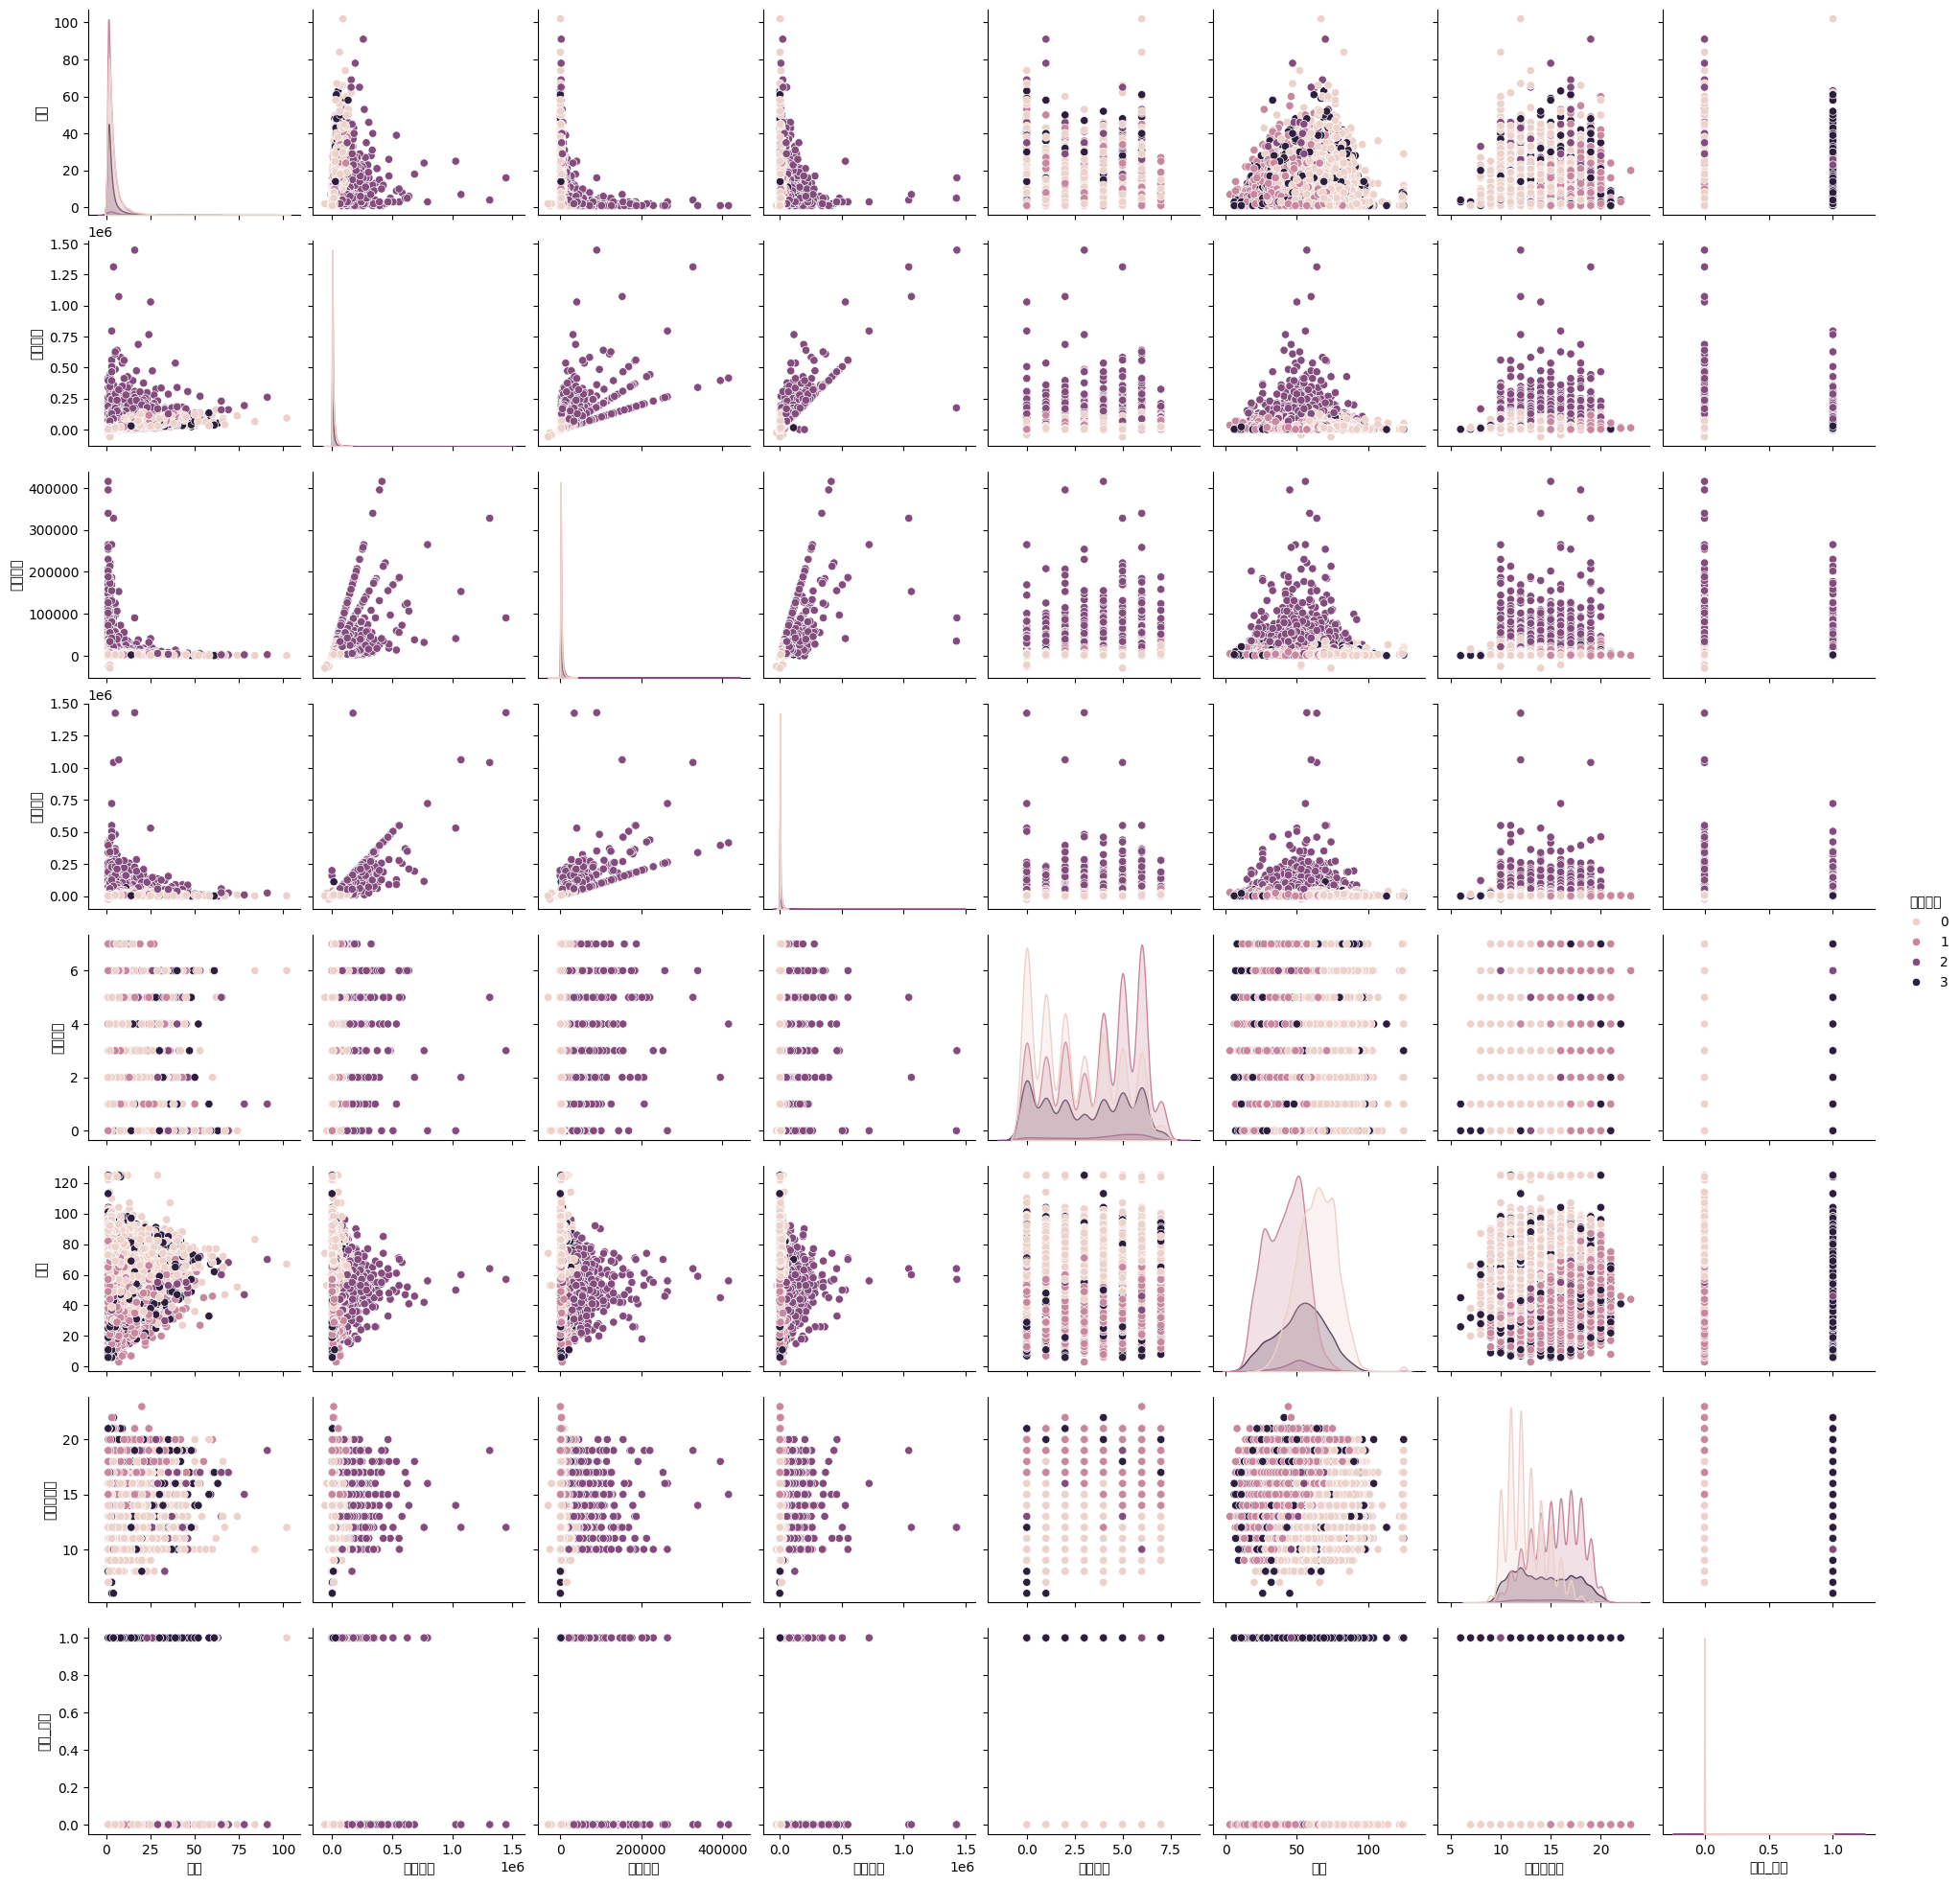

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. 変換
df["利用日時"] = pd.to_datetime(df["利用日時"], errors="coerce")
df["誕生日"] = pd.to_datetime(df["誕生日"], errors="coerce")
df["利用日"] = pd.to_datetime(df["利用日"], errors="coerce")

# 2. 特徴量作成
df["年齢"] = df["誕生日"].apply(lambda x: (datetime.now() - x).days // 365 if pd.notnull(x) else np.nan)
df["性別"] = df["性別区分"].apply(lambda x: "男性" if isinstance(x, str) and "1:男性" in x else "女性")

# 3. 曜日変換
weekday_map = {'月':0, '火':1, '水':2, '木':3, '金':4, '土':5, '日':6, '祝':7}
df["曜日数値"] = df["曜日8"].map(weekday_map)

# 4. 集約（NaN対策付き）
def safe_mode(series):
    try:
        return series.mode().iloc[0]
    except:
        return -1

agg_df = df.groupby("会員番号").agg({
    "利用金額": ["count", "sum", "mean", "max"],
    "曜日数値": safe_mode,
    "性別": safe_mode,
    "年齢": "mean",
    "利用日時": lambda x: safe_mode(x.dt.hour) if x.notnull().all() else -1
}).reset_index()

# カラム名整形
agg_df.columns = ["会員番号", "回数", "合計金額", "平均金額", "最大金額", "最頻曜日", "性別", "年齢", "最頻時間帯"]

# 性別ワンホットエンコーディング
agg_df = pd.get_dummies(agg_df, columns=["性別"], drop_first=True)

# NaNをゼロ埋め or 平均値補完
agg_df.fillna(agg_df.mean(numeric_only=True), inplace=True)

# 特徴量選定
features = ["回数", "合計金額", "平均金額", "最大金額", "最頻曜日", "年齢", "最頻時間帯"]
if "性別_男性" in agg_df.columns:
    features.append("性別_男性")

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df[features])

# クラスタリング（例：4クラスタ）
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
agg_df["クラスタ"] = kmeans.fit_predict(X_scaled)


In [16]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv("../.env"))

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", "")

In [18]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage, SystemMessage
from tqdm import tqdm

# OpenAIモデル設定
llm = ChatOpenAI(model="gpt-4", temperature=0.7, openai_api_key=OPENAI_API_KEY)

# プロンプトテンプレート
prompt_template = PromptTemplate(
    input_variables=["features"],
    template="""
以下の購買パターンの顧客クラスタに対して、マーケティング担当者がわかりやすく社内共有しやすい名前を1つつけてください。
特徴: {features}
例:「昼間によく来るシニア女性」「頻繁にまとめ買いする家族層」など
"""
)

# 各クラスタごとの特徴を集計
cluster_descriptions = []
for cluster_id in sorted(agg_df["クラスタ"].unique()):
    sub = agg_df[agg_df["クラスタ"] == cluster_id][features]
    desc = sub.mean().round(2).to_dict()
    cluster_descriptions.append((cluster_id, desc))

# 各クラスタに名前をつける（LangChain）
cluster_names = {}
for cluster_id, desc in tqdm(cluster_descriptions):
    prompt = prompt_template.format(features=desc)
    messages = [
        SystemMessage(content="あなたはマーケティング部門の分析担当者です。"),
        HumanMessage(content=prompt)
    ]
    response = llm(messages)
    cluster_names[cluster_id] = response.content.strip()

# 名前をマージ
agg_df["クラスタ名"] = agg_df["クラスタ"].map(cluster_names)


/tmp/ipykernel_1581/985259890.py:7: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-4", temperature=0.7, openai_api_key=OPENAI_API_KEY)
  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_1581/985259890.py:34: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(messages)
100%|██████████| 4/4 [00:07<00:00,  1.77s/it]


In [30]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np

# --- 日本語フォント対応（環境に応じてインストール or 他のフォントに変更可） ---
# 例: IPAexGothic（macなら "Hiragino Sans", Windowsなら "MS Gothic" でもOK）
plt.rcParams['font.family'] = 'IPAexGothic'  # or 'Hiragino Sans' or 'IPAPGothic'

# --- レーダーチャート関数 ---
def plot_cluster_radar_chart(df, features, cluster_label_col="クラスタ名", title="クラスタ特徴比較"):
    # 平均値でクラスタごとに集計
    cluster_summary = df.groupby(cluster_label_col)[features].mean()

    # 特徴量を0〜1に正規化
    cluster_summary_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

    labels = cluster_summary.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 円形にするため

    # 描画開始
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for idx, row in cluster_summary_norm.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=16)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    plt.tight_layout()
    plt.show()


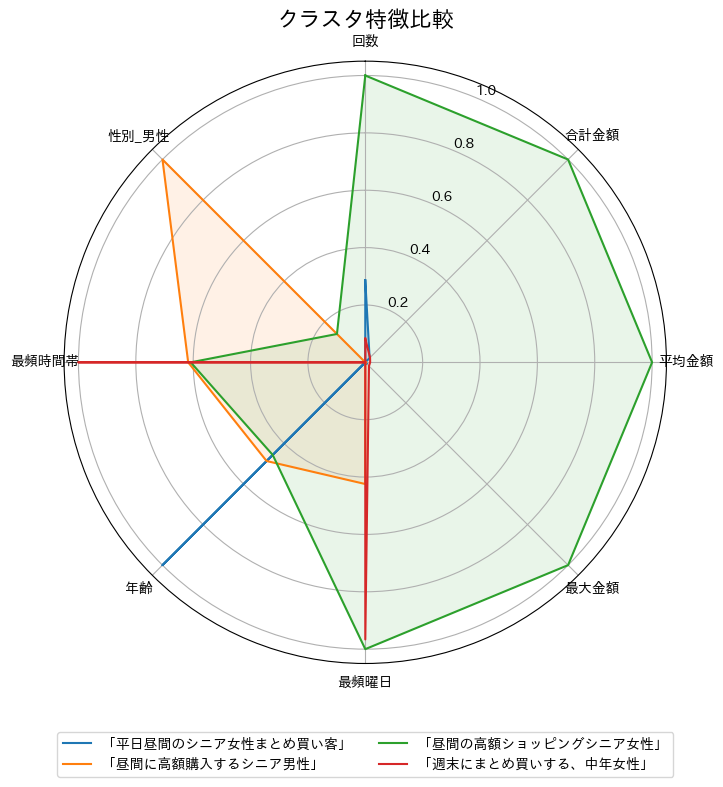

In [31]:
plot_cluster_radar_chart(agg_df, features)


In [32]:
agg_df

,会員番号,回数,合計金額,平均金額,最大金額,最頻曜日,年齢,最頻時間帯,性別_男性,クラスタ,クラスタ名
0,10000061,2,2926,1463.000000,1886,6,62.0,16,True,3,「昼間に高額購入するシニア男性」
1,10000178,5,12928,2585.600000,3906,1,66.0,11,False,0,「平日昼間のシニア女性まとめ買い客」
2,10000182,4,8673,2168.250000,2818,0,72.0,10,False,0,「平日昼間のシニア女性まとめ買い客」
3,10000221,4,17910,4477.500000,9000,2,79.0,14,False,0,「平日昼間のシニア女性まとめ買い客」
4,10000407,19,48364,2545.473684,4132,0,53.0,18,False,1,「週末にまとめ買いする、中年女性」
...,...,...,...,...,...,...,...,...,...,...,...
71050,165067648,3,4165,1388.333333,2289,2,72.0,12,False,0,「平日昼間のシニア女性まとめ買い客」
71051,175050228,1,1893,1893.000000,1893,0,49.0,17,False,1,「週末にまとめ買いする、中年女性」
71052,175055051,1,3200,3200.000000,3200,2,73.0,14,False,0,「平日昼間のシニア女性まとめ買い客」
71053,185043917,18,69981,3887.833333,6809,0,59.0,14,False,0,「平日昼間のシニア女性まとめ買い客」
